Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_ver
Info in <TCanvas::Print>: png file Ver.png has been created


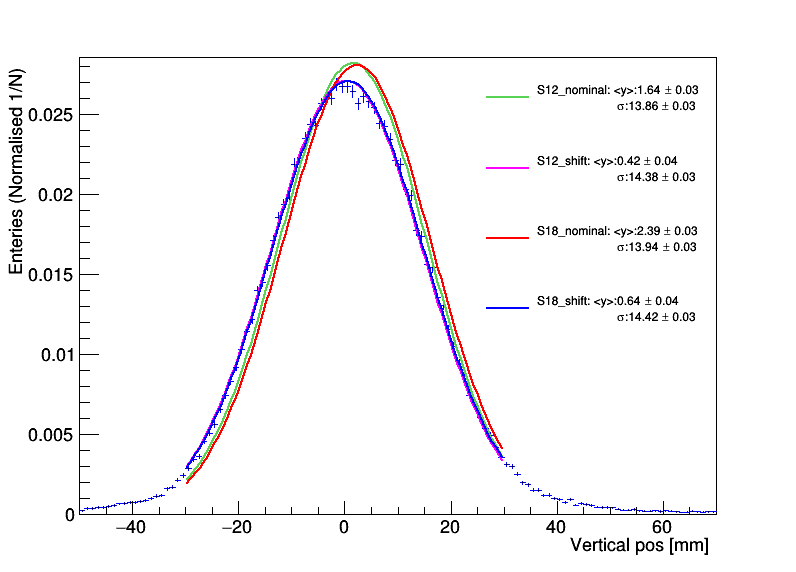

In [5]:
# Juoyer ROOT import 
import sys
sys.path.append("/usr/local/Cellar/root/6.14.04_2/lib/root")
# ROOT includes 
from ROOT import TH1F, TH2F, TF1, TCanvas, TFile, gStyle, TPaveText, TLegend

#Define constant paths and labels 
station12Path = "Extrapolation/vertices/station12/"
station18Path = "Extrapolation/vertices/station18/"
path = [station12Path, station18Path] # S12 (0) and S18 (1)
scr_nominal = "/Users/gleb/software/alignTrack/mpIIDESY/Systematics_ana/nominal/trackRecoPlots.root"
scr_shift = "/Users/gleb/software/alignTrack/mpIIDESY/Systematics_ana/Global/trackRecoPlots.root"
plotNames=["h_radialPos_vs_time", "h_verticalPos_vs_time"] 
stationN = 2 # S12 (0) and S18 (1)
viewN = 2 # radial (0) and vertical (1)
stateN=2 # nominal (0) and global shift (1)

#Containers to store histograms in orders as the names 
names = ["S12_nominal", "S12_shift", "S18_nominal", "S18_shift"]
colors = [8, 6, 2, 4]
fitResult = ["<y>", "\#sigma"]

#Open TFiles
scrFile_nominal = TFile.Open(scr_nominal)
scrFile_shift = TFile.Open(scr_shift)
fileName = [scrFile_nominal, scrFile_shift] # nominal (0) and global shift (1)

###### Vertical ##########
         
#Make new canvas for plots 
c_ver = TCanvas("c_ver", "Vertical Projection", 800, 600)
legend =  TLegend(0.9, 0.89, 0.6, 0.4)

i_total = 0 # total counter 
# TODO use 2D arrays next time 
for i_station in range(0, stationN):
    for i_state in range(0, stateN):
    
        #Get the TH2F 
        ver_histo_2D = fileName[i_state].Get(str(path[i_station])+plotNames[1]) # 1 = vertical here
        #Apply 30 us time cut 
        first_bin = ver_histo_2D.GetXaxis().FindBin(30.0) 

        # Project the beam postion into 1D histo
        hist_1D =ver_histo_2D.ProjectionY("", first_bin, -1)
        hist_1D.SetTitle("")
        hist_1D.GetXaxis().SetRangeUser(-50, 70) # Same range as Joe's 
        #hist_1D.GetYaxis().SetRangeUser(0, 8500) # Same range as Joe's 
        hist_1D.SetLineColor(colors[i_total])
        norm = hist_1D.GetEntries();
        hist_1D.Scale(1/norm); # normalise the histo 
        hist_1D.GetYaxis().SetTitle("Enteries (Normalised 1/N)")
        hist_1D.GetYaxis().SetTitleOffset(1.4);
#         hist_1D.Draw("same")

        #Define a Gaussian fit function between -30 to 30 mm 
        gF = TF1("gF", "gaus", -30.0, 30.0)
        hist_1D.Fit(gF, "QR", ) # quite fit over the specified range above
        gF.SetLineColor(colors[i_total])
        gF.Draw("same")

        mean = round(gF.GetParameter(1), 2)
        mean_error = round(gF.GetParError(1), 2)
        sd = round(gF.GetParameter(2), 2)
        sd_error = round(gF.GetParError(2), 2)

        legenValue1 = str(names[i_total])+": <y>:"+str(mean)+" #pm "+str(mean_error) 
        legenValue2 = "#sigma:"+str(sd)+" #pm "+str(sd_error)
        legend.AddEntry(gF,"#splitline{"+str(legenValue1)+"}{                    "+str(legenValue2)+"}","L")
        legend.Draw("same")
        
        i_total+=1 


gStyle.SetOptStat(0) 
gStyle.SetOptFit(0)
gStyle.SetLegendBorderSize(0)
gStyle.SetLegendTextSize(0.023)
c_ver.Draw()
c_ver.Print("Ver.png")